In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import cv2

# Import libraries
import os
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torch


# Torchvision Utilities for Image Data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

video: https://drive.google.com/file/d/1hJO1sEV2GwMhIL9ueAGkj5Ltp2kP3i4o/view?usp=drive_link.

# Goals: Osteoarthritis

In [ ]:
# Read File
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/2B_Deep Learning/train'
test_dir = '/content/drive/MyDrive/2B_Deep Learning/test'

Mounted at /content/drive


# Exploratory Data Analysis

## Distribusi Warna pada Data Set
memperlihatkan pesebaran warna dalam data test dan train dan mengetahui apakah mengandung gambar bersifat RGB atau grayscale.

### Data Train

Checking images in train directory:
Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Mild/2_Mild_215.png
Image is RGB. Plotting color histogram.


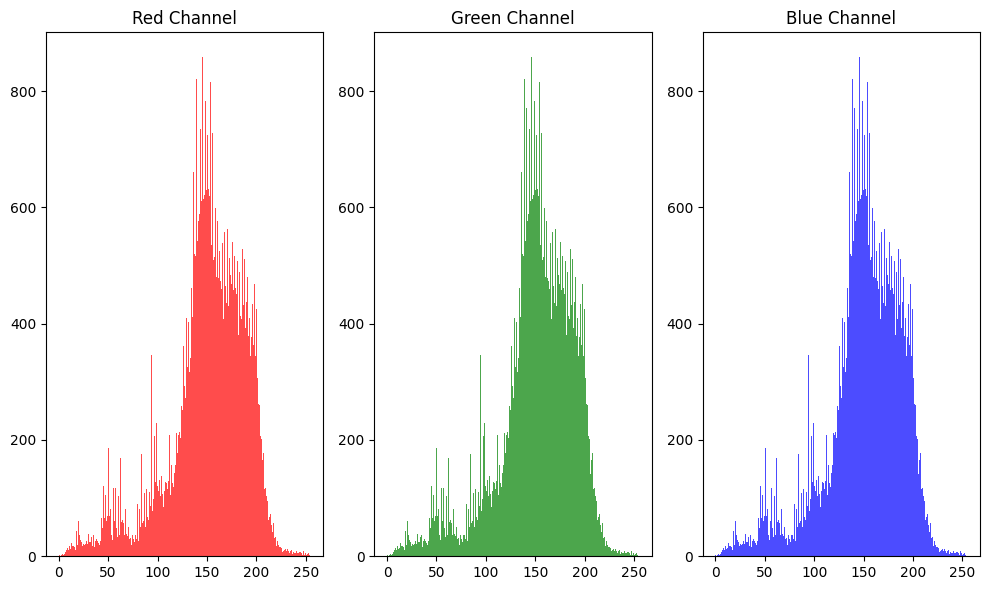

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Mild/2_Mild_5.png
Image is RGB. Plotting color histogram.


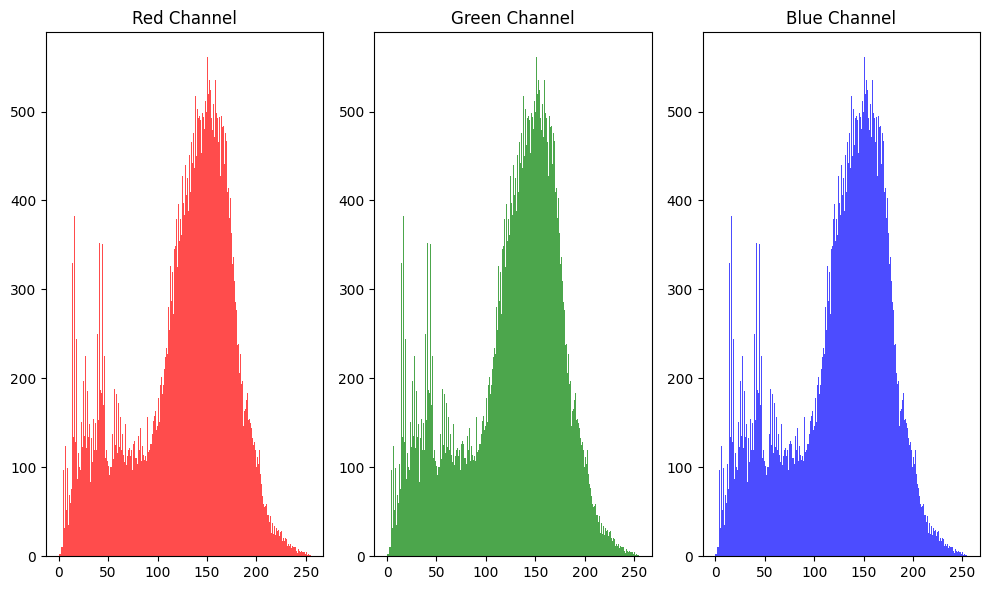

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Mild/2_Mild_203.png
Image is RGB. Plotting color histogram.


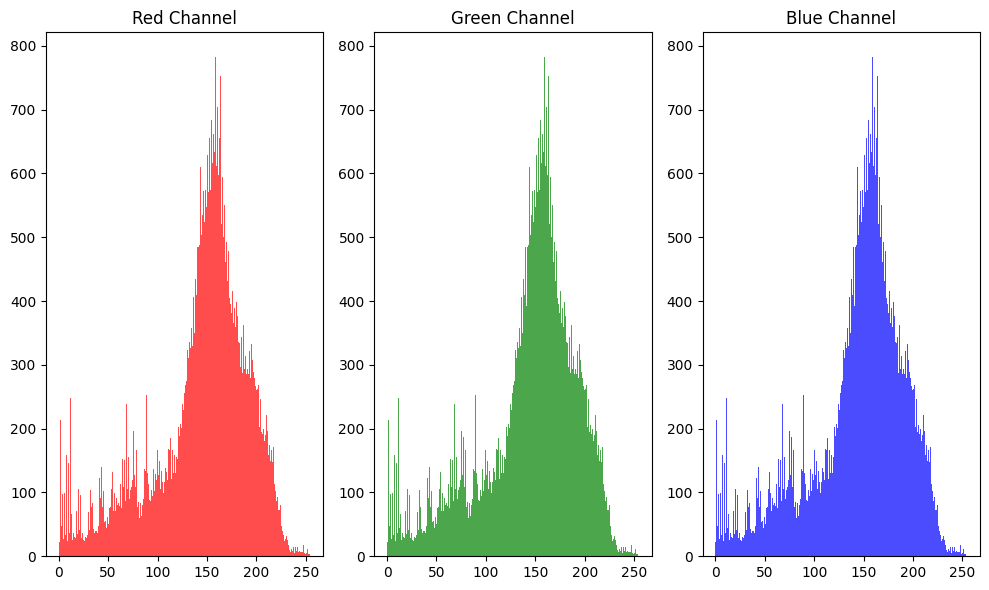

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Mild/2_Mild_473.png
Image is RGB. Plotting color histogram.


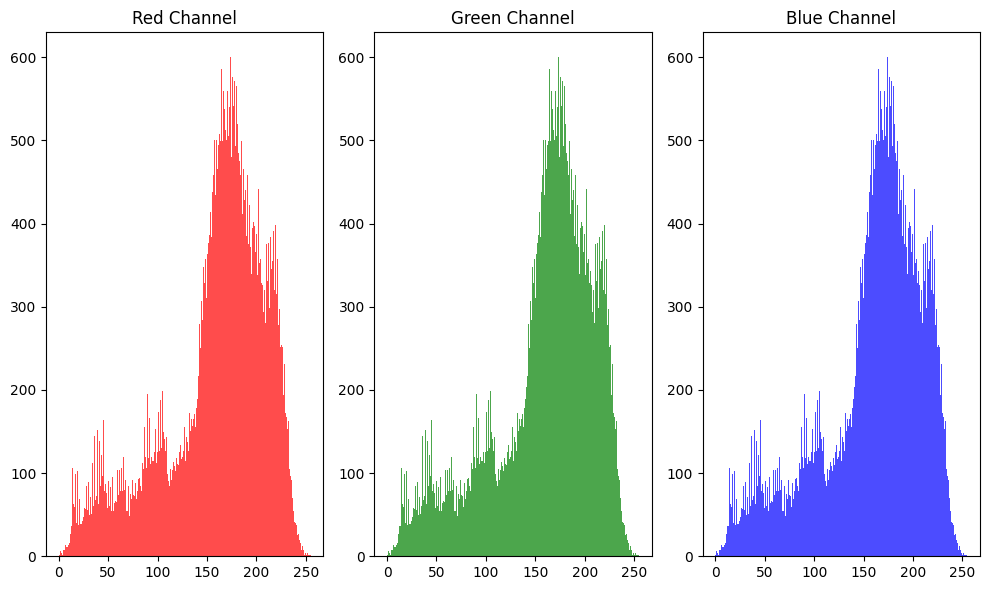

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Mild/2_Mild_91.png
Image is RGB. Plotting color histogram.


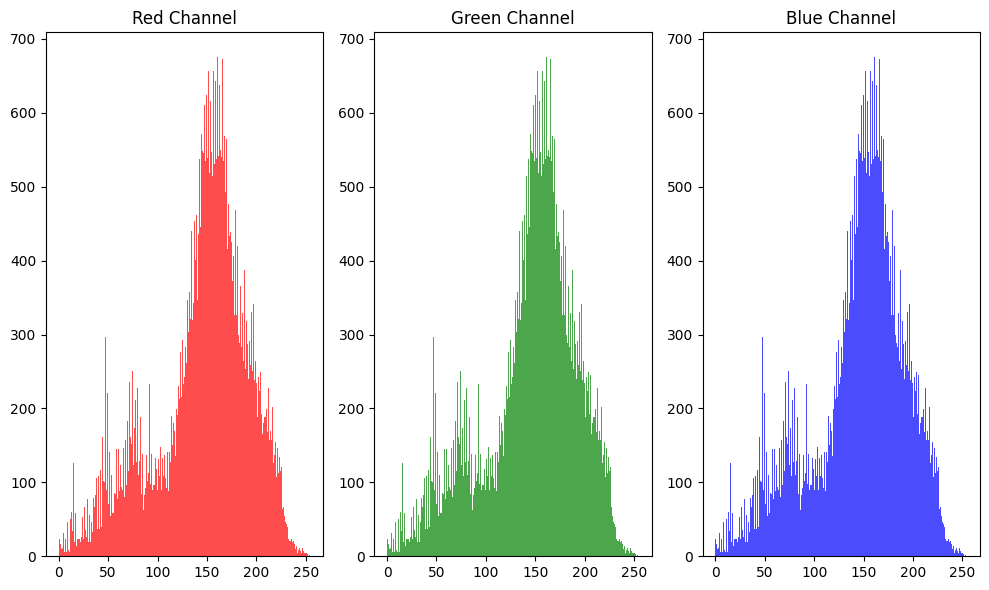

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Normal/0_Normal_272.png
Image is RGB. Plotting color histogram.


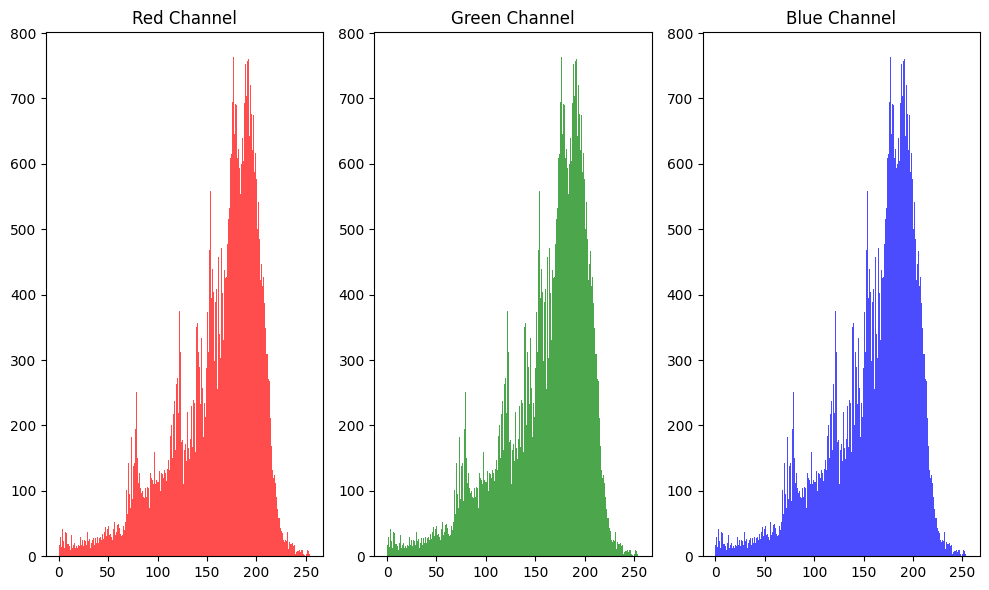

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Normal/0_Normal_106.png
Image is RGB. Plotting color histogram.


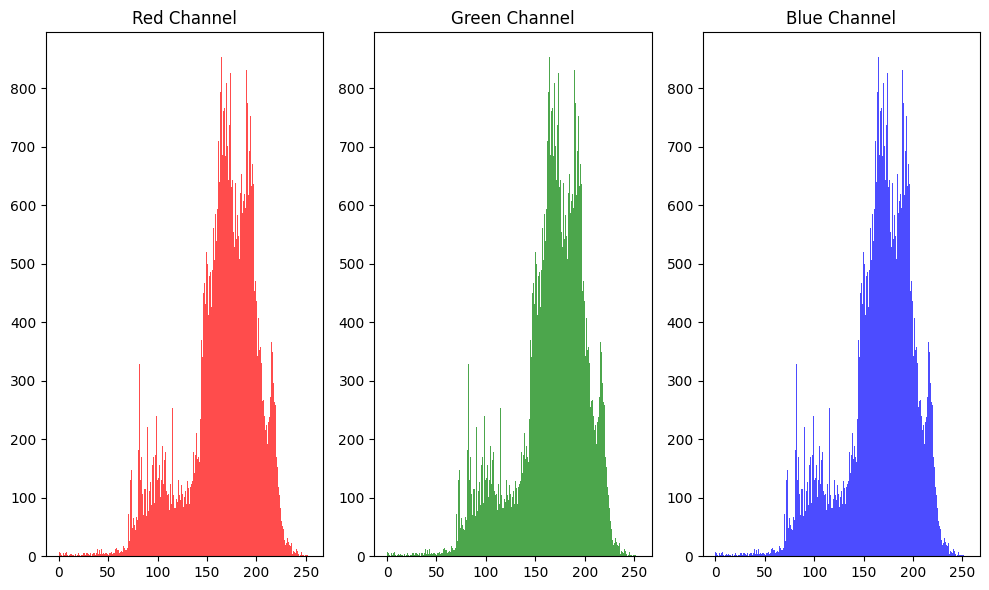

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Normal/0_Normal_227 (2).png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Normal/0_Normal_559.png
Image is RGB. Plotting color histogram.


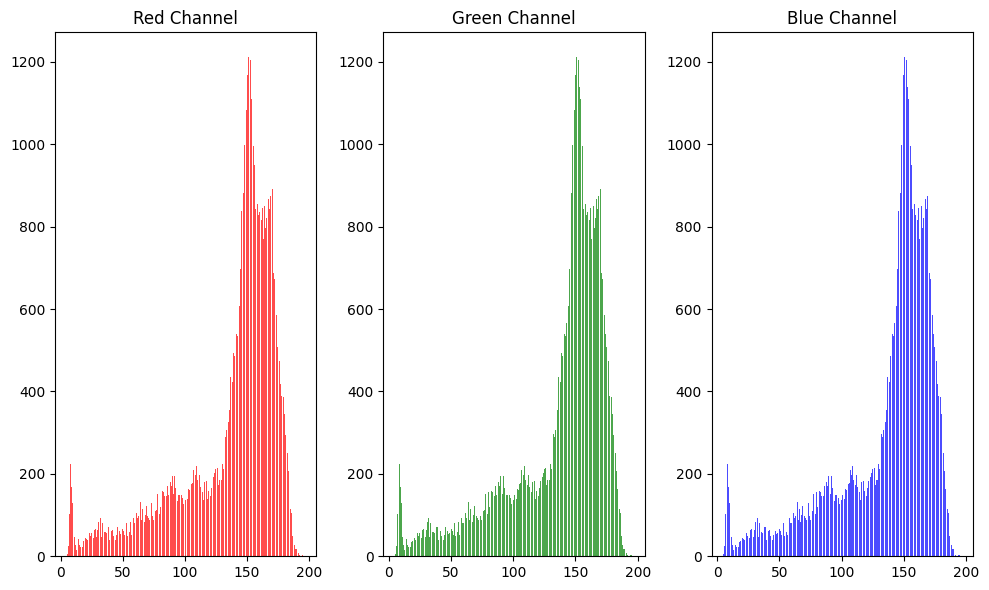

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Normal/0_Normal_185.png
Image is RGB. Plotting color histogram.


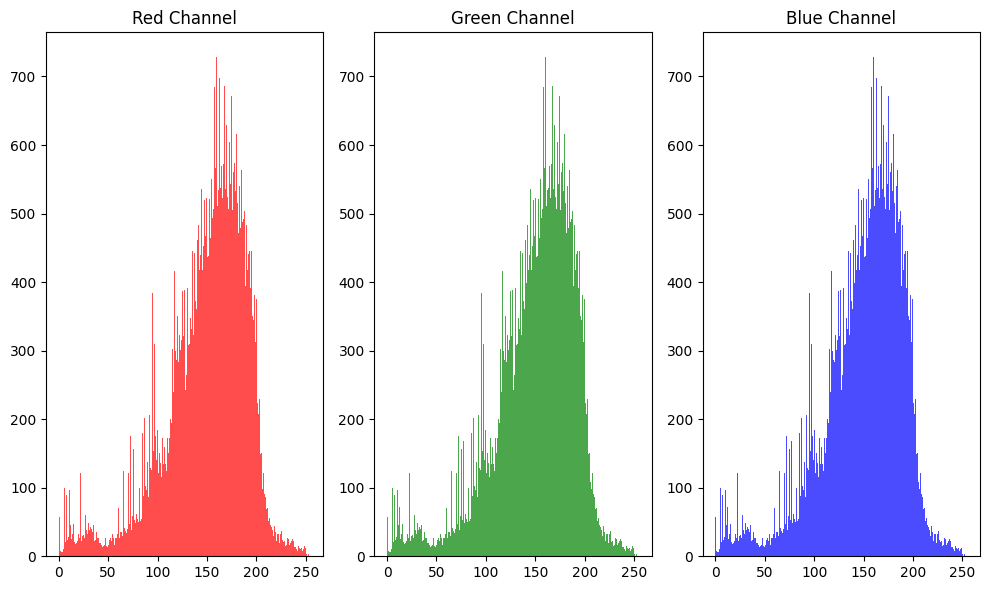

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Moderate/3_Moderate_454.png
Image is RGB. Plotting color histogram.


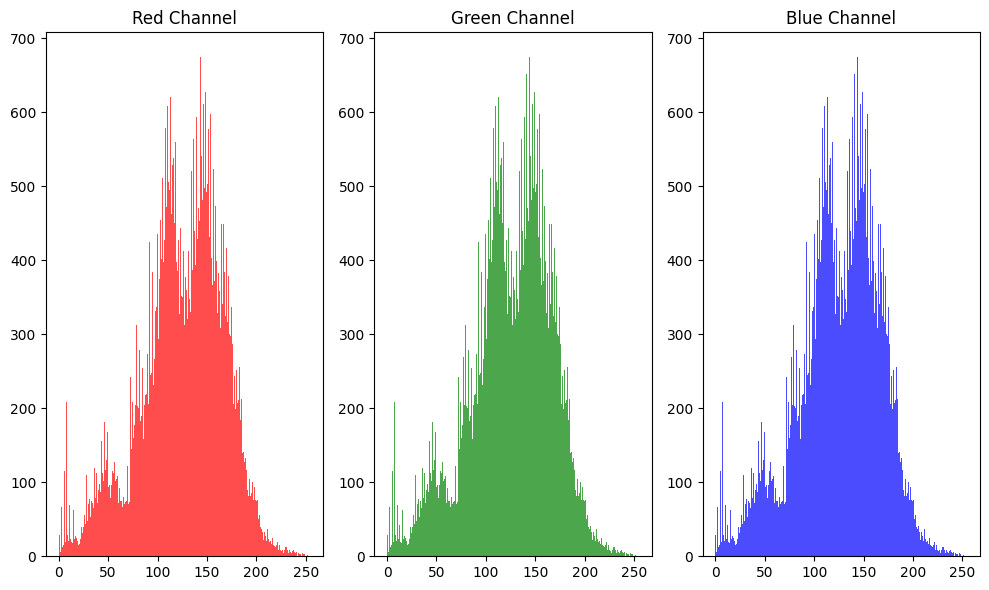

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Moderate/3_Moderate_555.png
Image is RGB. Plotting color histogram.


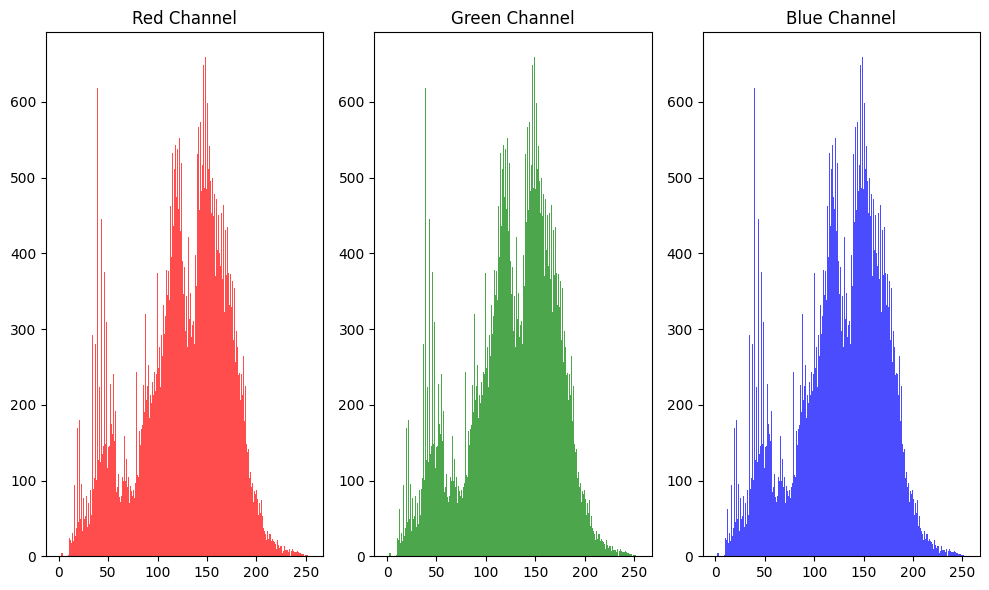

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Moderate/3_Moderate_349.png
Image is RGB. Plotting color histogram.


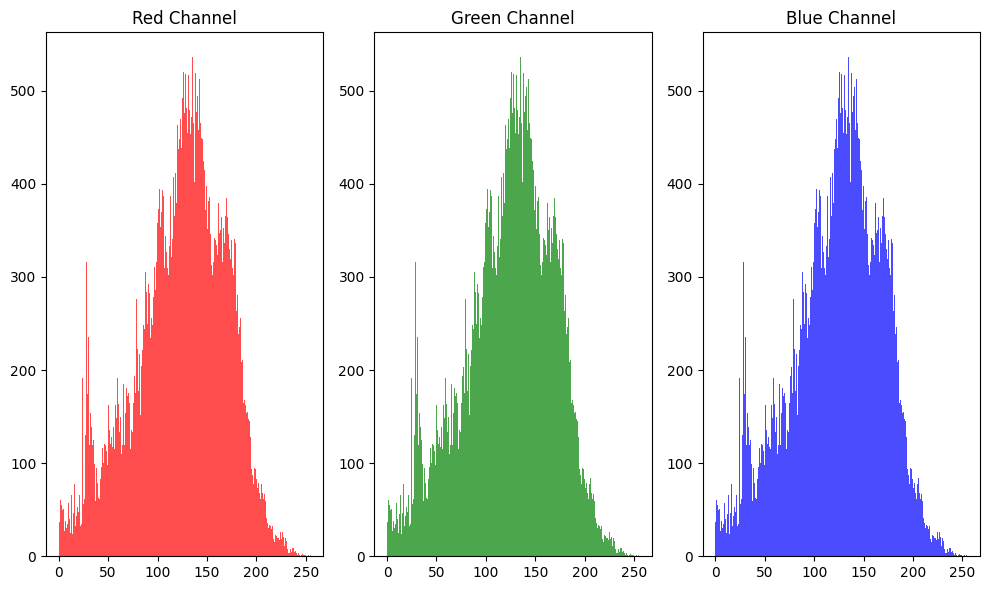

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Moderate/3_Moderate_764.png
Image is RGB. Plotting color histogram.


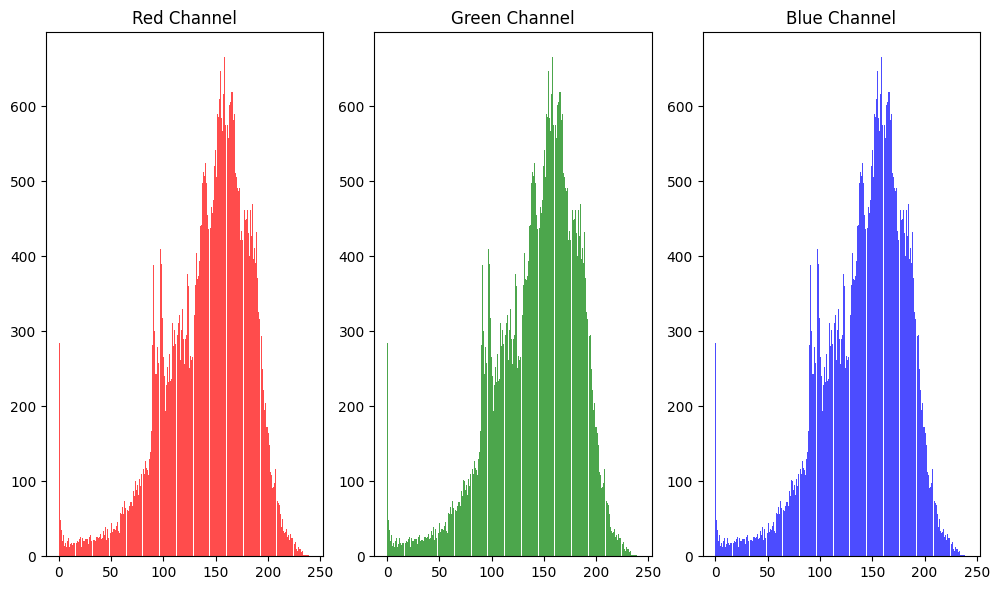

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Moderate/3_Moderate_54 (2).png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Severe/4_Severe_390.png
Image is RGB. Plotting color histogram.


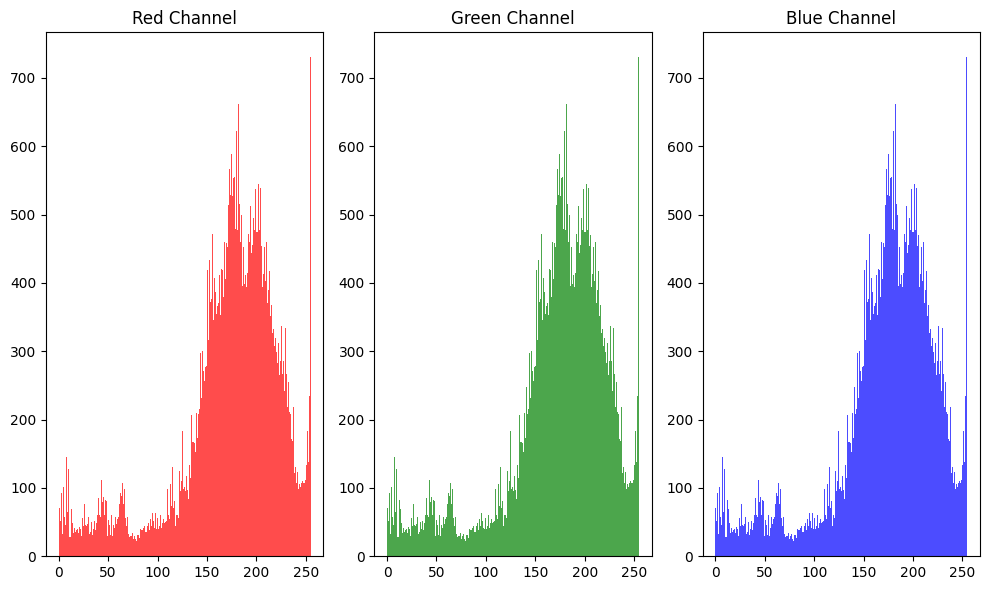

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Severe/4_Severe_610.png
Image is RGB. Plotting color histogram.


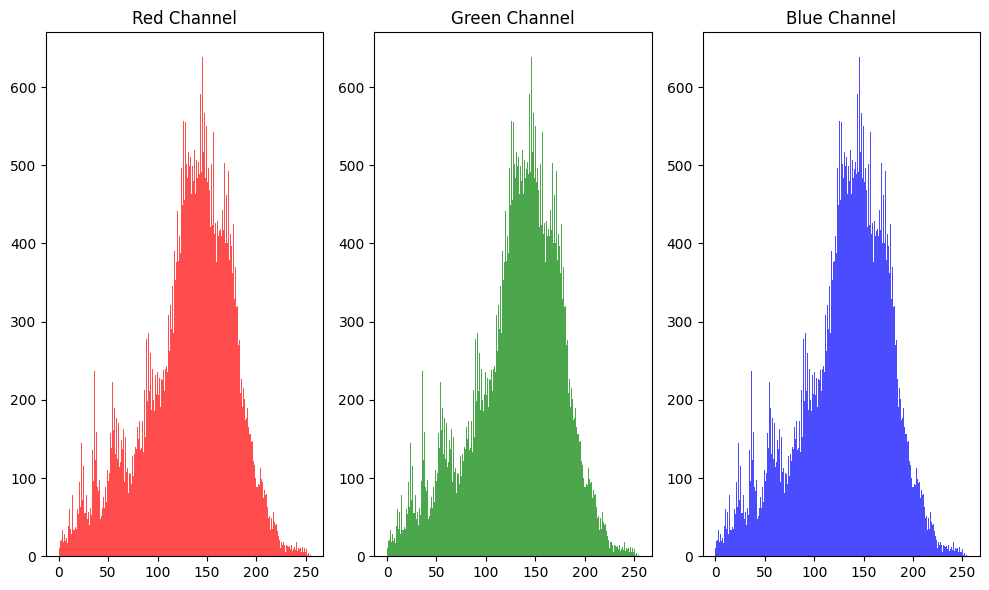

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Severe/4_Severe_555.png
Image is RGB. Plotting color histogram.


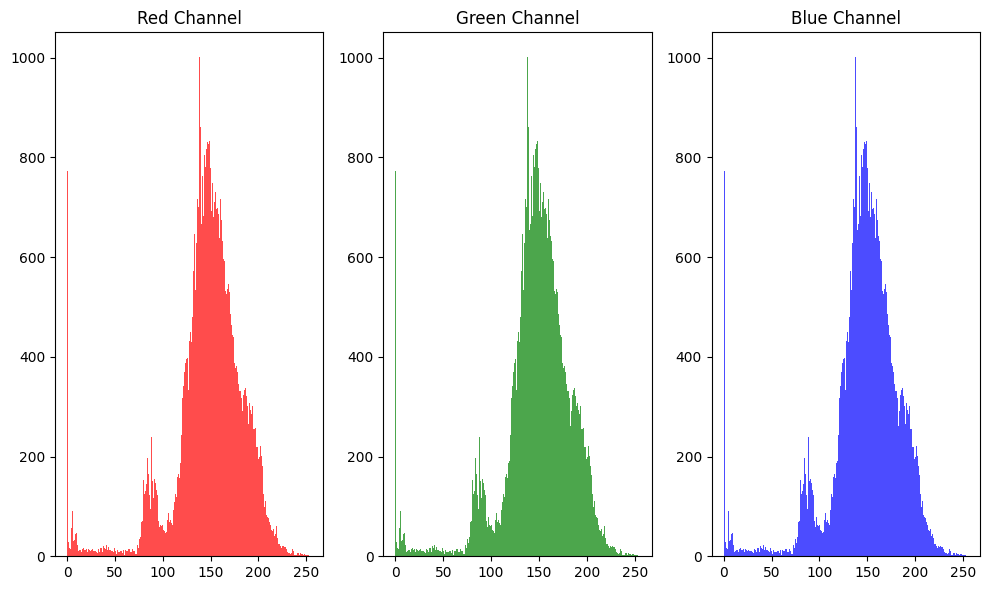

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Severe/4_Severe_302.png
Image is RGB. Plotting color histogram.


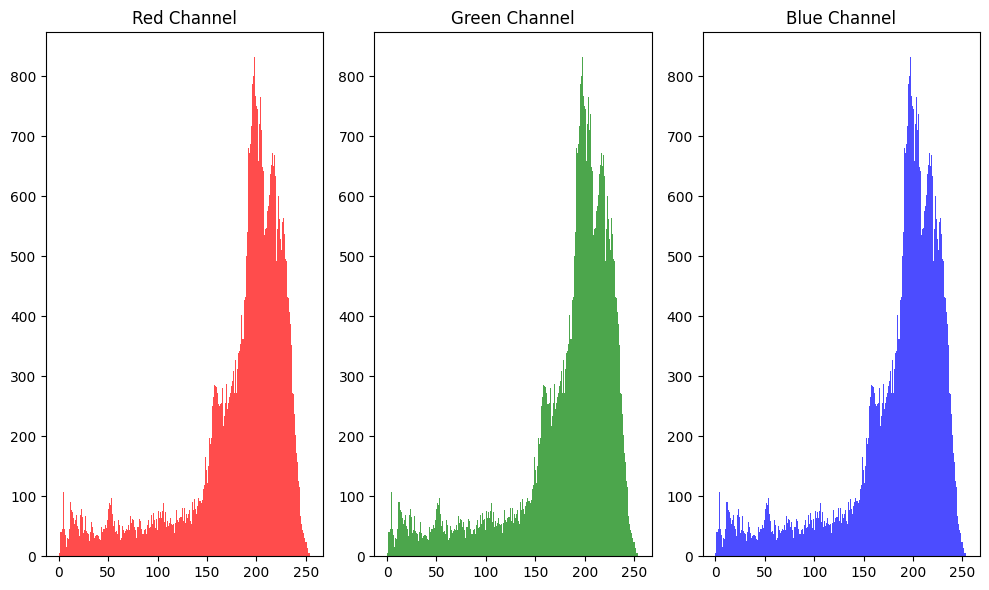

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Severe/4_Severe_777.png
Image is RGB. Plotting color histogram.


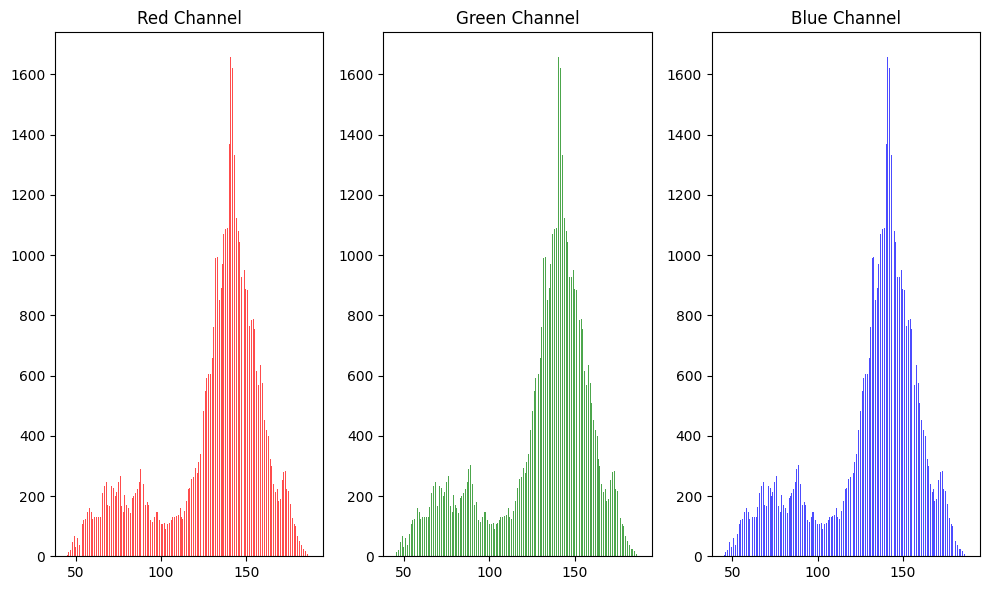

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Doubtful/1_Doubtful_668.png
Image is RGB. Plotting color histogram.


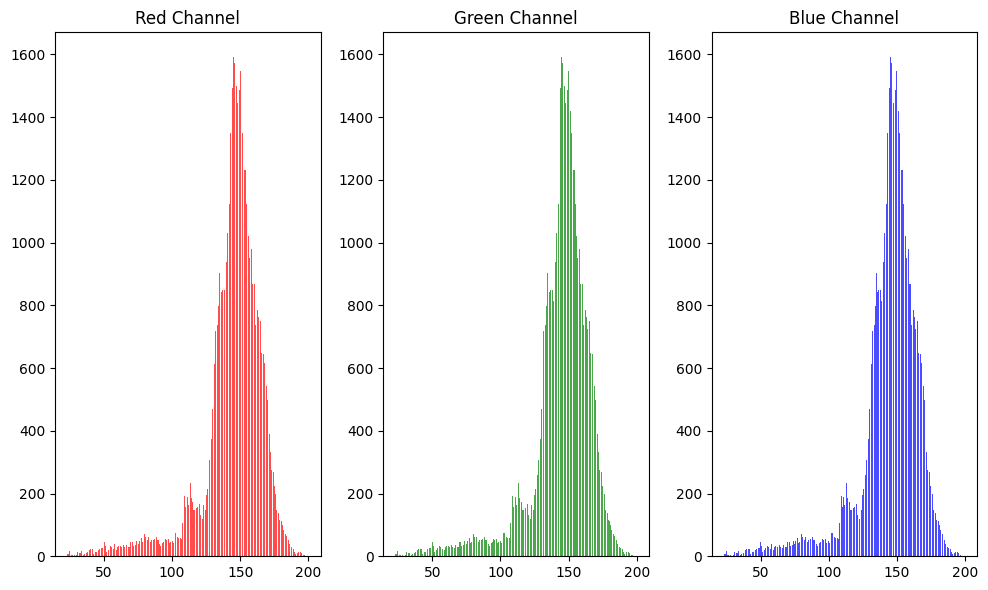

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Doubtful/1_Doubtful_133.png
Image is RGB. Plotting color histogram.


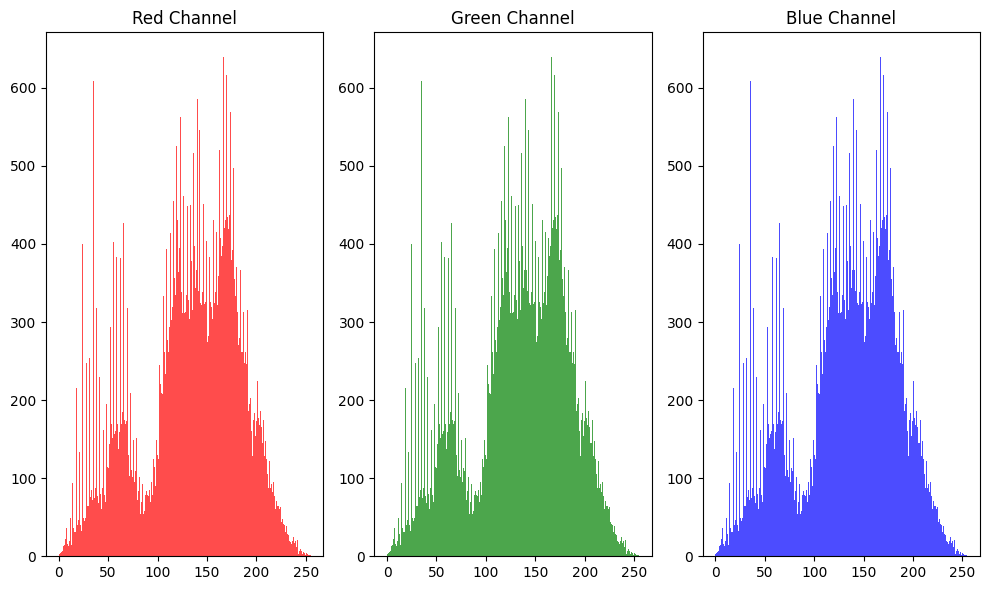

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Doubtful/1_Doubtful_656.png
Image is RGB. Plotting color histogram.


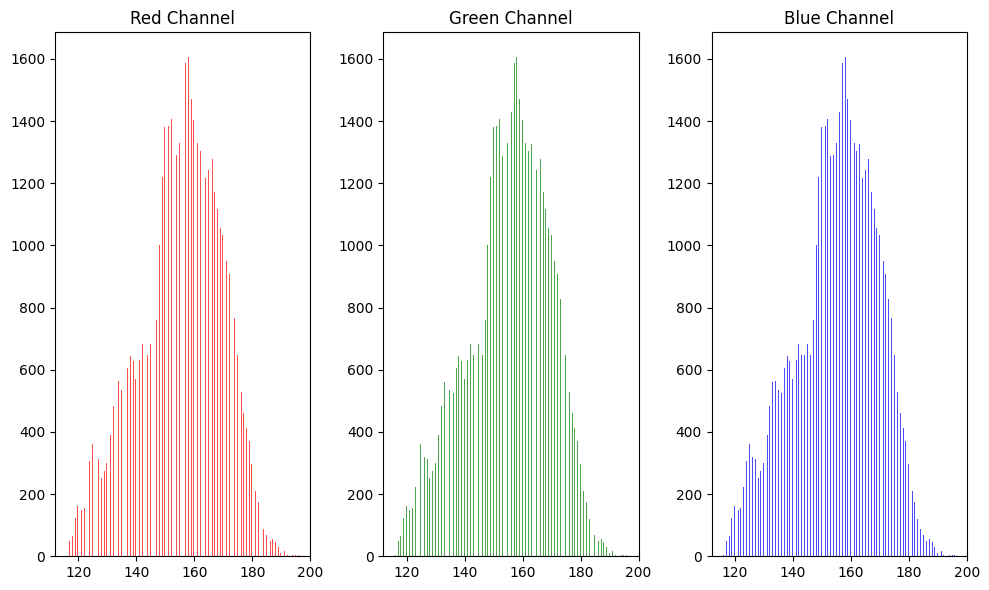

Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Doubtful/1_Doubtful_141 (2).png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/train/Doubtful/1_Doubtful_794.png
Image is RGB. Plotting color histogram.


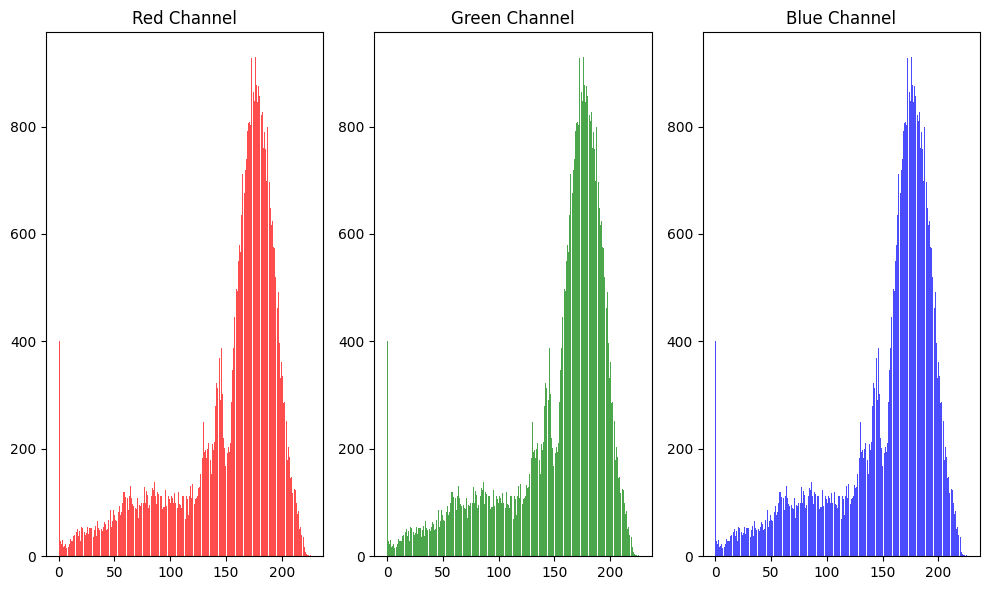

In [ ]:
def check_and_plot_image(image_path):
    img = Image.open(image_path)
    # Mengecek apakah gambar berformat RGB
    if img.mode == 'RGB':
        print("Image is RGB. Plotting color histogram.")
        img_array = np.array(img)

        # Membagi channel R, G, B
        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

        # Plot histogram untuk setiap chanel
        plt.figure(figsize=(10, 6))

        plt.subplot(1, 3, 1)
        plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
        plt.title('Red Channel')

        plt.subplot(1, 3, 2)
        plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
        plt.title('Green Channel')

        plt.subplot(1, 3, 3)
        plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
        plt.title('Blue Channel')

        plt.tight_layout()
        plt.show()

    elif img.mode == 'L':  # Mode 'L' berarti grayscale
        print("Image is grayscale.")

    else:
        print(f"Image mode is {img.mode}, not recognized as RGB or grayscale.")

def plot_random_images_from_dir(dataset_dir, num_images_per_class=5):
    class_names = os.listdir(dataset_dir)

    # Untuk setiap kelas, mau ambil gambar secara acak
    for class_name in class_names:
        class_path = os.path.join(dataset_dir, class_name)

        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            random_images = random.sample(image_files, num_images_per_class)

            # Cek dan plot gambar
            for image_file in random_images:
                image_path = os.path.join(class_path, image_file)
                print(f"Checking image: {image_path}")
                check_and_plot_image(image_path)


print("Checking images in train directory:")
plot_random_images_from_dir(train_dir, num_images_per_class=5)

Distribusi Histogram untuk train data memperlihatkan bahwa pada dataset train ini memiliki gambar RGB (berdimensi 3)

## Data Test

In [ ]:
print("\nChecking images in test directory:")
plot_random_images_from_dir(test_dir, num_images_per_class=5)


Checking images in test directory:
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Mild/2_Mild_17.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Mild/2_Mild_3.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Mild/2_Mild_26.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Mild/2_Mild_65.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Mild/2_Mild_8.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Doubtful/1_Doubtful_12.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Doubtful/1_Doubtful_73.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Doubtful/1_Doubtful_96.png
Image is grayscale.
Checking image: /content/drive/MyDrive/2B_Deep Learning/test/Doubtful/1_Doubtful_88.png
Image is grayscale.
Checking image: /content/drive/MyD

Melalui proses pengecekkan distribusi, dapat dilihat bahwa data test hanya memiliki gambar grayscale (berdimensi 2)

# Melihat Variability pada Data Set
mencakup lighting, angle, occlusions.
- Lighting: Variasi pencahayaan dalam gambar.
- Angle: memvisualisasikan gambar yang diambil dari berbagai sudut.
- Occlusions: Jika objek terhalang oleh objek lain

## Variability Data Train

### Lighting

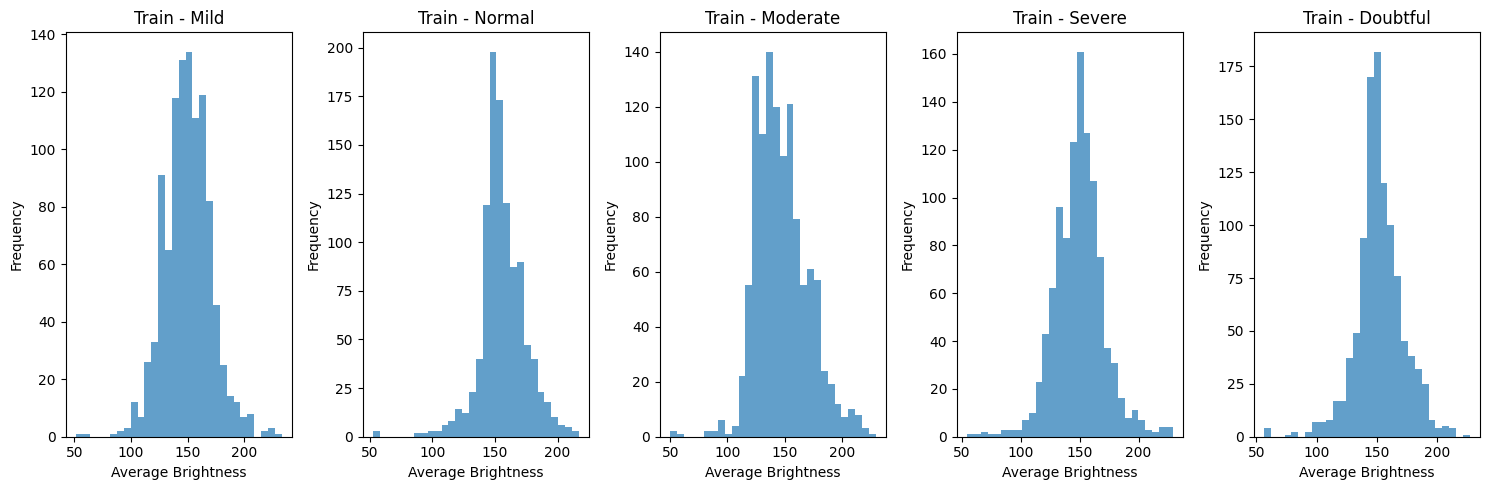

In [ ]:
def plot_brightness_per_class_simple(image_dir, dataset_name="Dataset", num_rows=1, num_cols=5):
    class_names = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

    num_classes = len(class_names)


    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    axes = axes.flatten()


    for i, class_name in enumerate(class_names[:5]):
        class_path = os.path.join(image_dir, class_name)
        brightness_values = []

        for file in os.listdir(class_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, file)
                img = Image.open(img_path).convert('L')
                brightness_values.append(np.mean(np.array(img)))

        ax = axes[i]
        ax.hist(brightness_values, bins=30, alpha=0.7)
        ax.set_title(f"{dataset_name} - {class_name}")
        ax.set_xlabel("Average Brightness")
        ax.set_ylabel("Frequency")


    plt.tight_layout()
    plt.show()

plot_brightness_per_class_simple(train_dir, "Train", num_rows=1, num_cols=5)

- **Mild**: Cenderung lebih banyak gambar dengan kecerahan lebih rendah sekitar 150.
- **Normal**: Kecerahan lebih merata, dengan puncak pada sekitar 125-150.
- **Moderate**: Distribusi lebih tersebar, dengan puncak pada sekitar 125-150.
- **Severe**: Lebih banyak gambar dengan kecerahan lebih tinggi.
- **Doubtful**: Mirip dengan Mild, namun dengan kecenderungan sedikit lebih terang.

### Occlusion

Occlusions Variability for Train Data


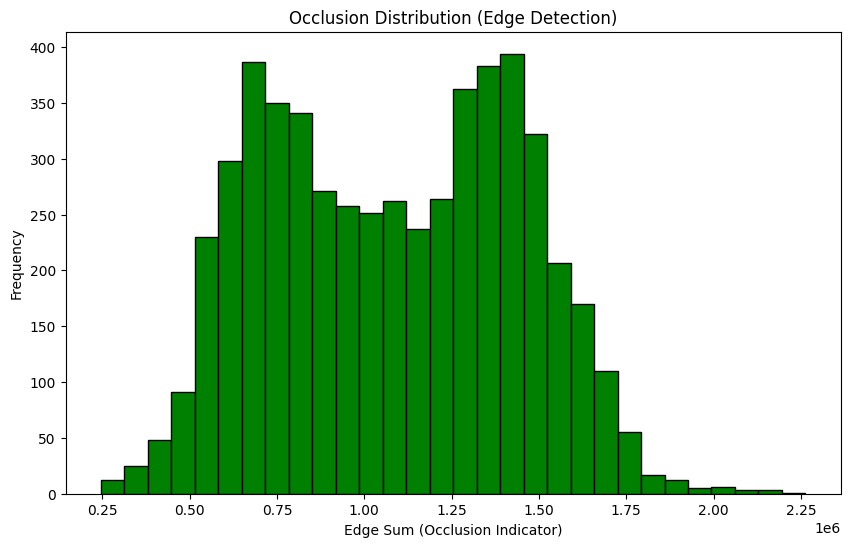

In [ ]:
def detect_occlusion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred = cv2.GaussianBlur(img, (5, 5), 0) # mengurangi noise pada gambar

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    edges = cv2.magnitude(sobel_x, sobel_y)

    # Jumlah edge rendah menandakan occlusion
    edge_sum = np.sum(edges)
    return edge_sum

def plot_occlusion_variability(image_dir):
    occlusions = []
    class_names = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

    for cls in class_names:
        cls_folder = os.path.join(image_dir, cls)
        for img_name in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_name)
            occlusion_score = detect_occlusion(img_path)
            occlusions.append(occlusion_score)

    plt.figure(figsize=(10, 6))
    plt.hist(occlusions, bins=30, color="green", edgecolor="black")
    plt.title("Occlusion Distribution (Edge Detection)")
    plt.xlabel("Edge Sum (Occlusion Indicator)")
    plt.ylabel("Frequency")
    plt.show()

print("Occlusions Variability for Train Data")
plot_occlusion_variability(train_dir)

Histogram ini menunjukkan distribusi **Edge Sum**, yang digunakan untuk mendeteksi **occlusion** (penutupan objek). Nilai **Edge Sum** yang lebih rendah menunjukkan occlusion lebih tinggi, sementara nilai yang lebih tinggi menunjukkan objek lebih terlihat.


Puncak pada histogram menunjukkan dua grup, satu dengan occlusion rendah dan satu lagi dengan occlusion lebih banyak.

### Angle

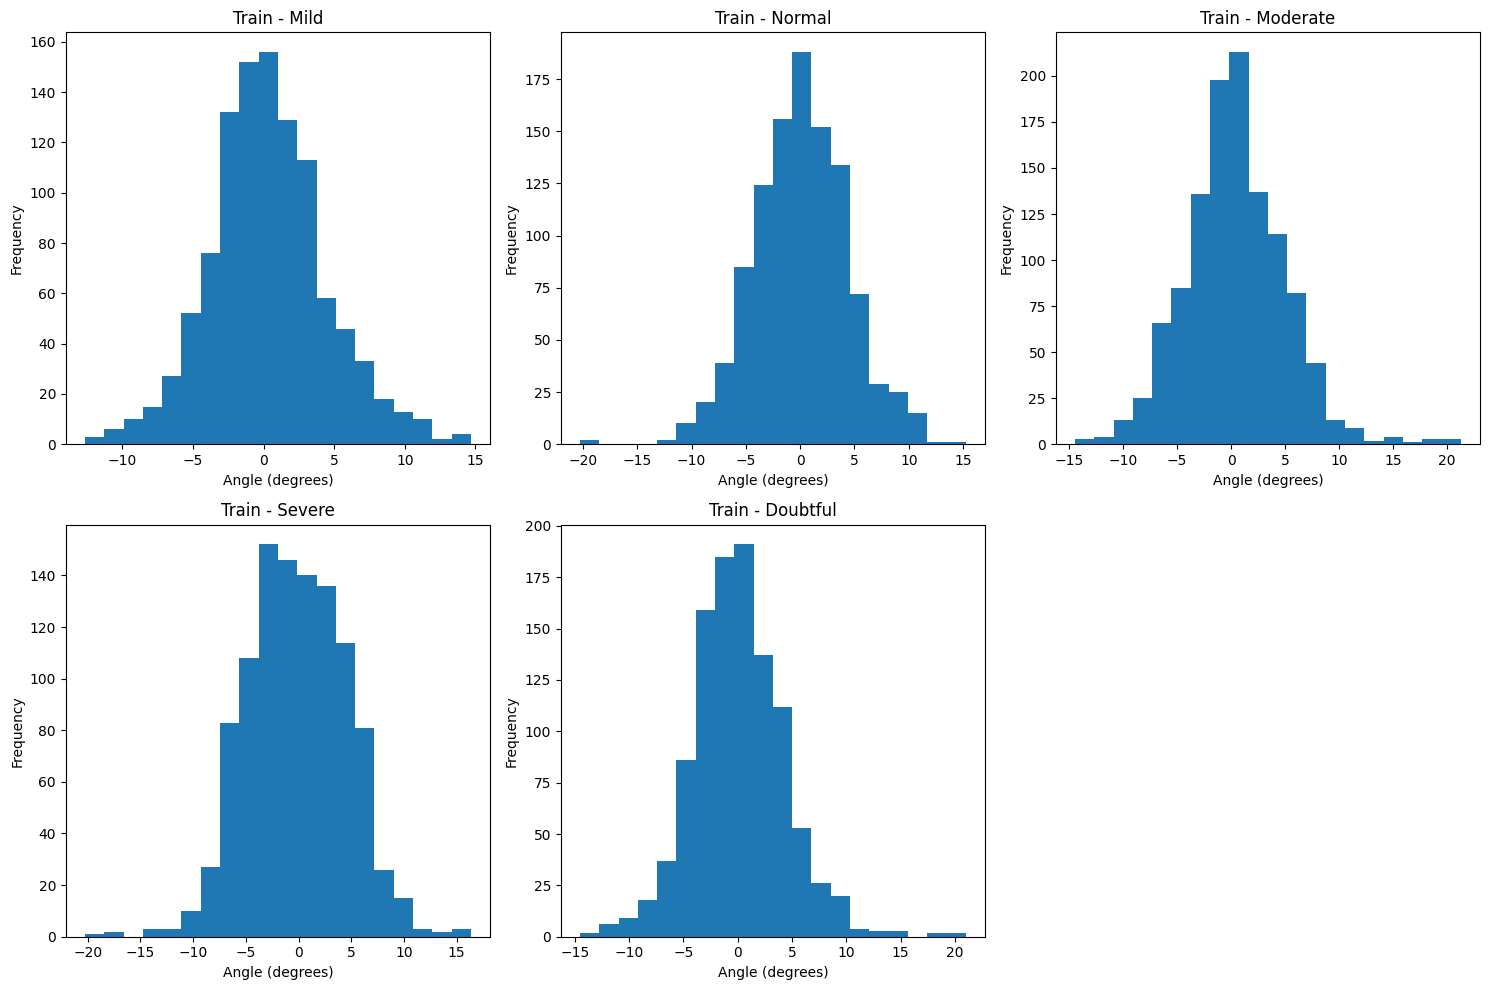

In [ ]:
def calculate_angle(image):
    gray = np.array(image.convert('L'))
    edges = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    angle = np.arctan2(edges, np.ones_like(edges))
    return np.degrees(angle).mean()

def plot_angle_variability(image_dir, dataset_name="Dataset"):
    class_names = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]


    rows = 2
    cols = 3

    plt.figure(figsize=(15, 10))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(image_dir, class_name)
        angles = []

        for file in os.listdir(class_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, file)
                img = Image.open(img_path)
                angles.append(calculate_angle(img))

        plt.subplot(rows, cols, i + 1)
        plt.hist(angles, bins=20)
        plt.title(f"{dataset_name} - {class_name}")
        plt.xlabel("Angle (degrees)")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_angle_variability(train_dir, "Train")

- Pada **Train - Mild** dan **Train - Normal**, distribusi sudut cenderung lebih terkonsentrasi di sekitar 0 derajat, menunjukkan sedikit rotasi atau kemiringan.

- Pada kategori lainnya seperti **Train - Severe** dan **Train - Doubtful**, distribusi lebih lebar dengan variasi sudut yang lebih besar, menunjukkan kemiringan atau rotasi yang lebih signifikan.

## Variability Data Test

### Lighting

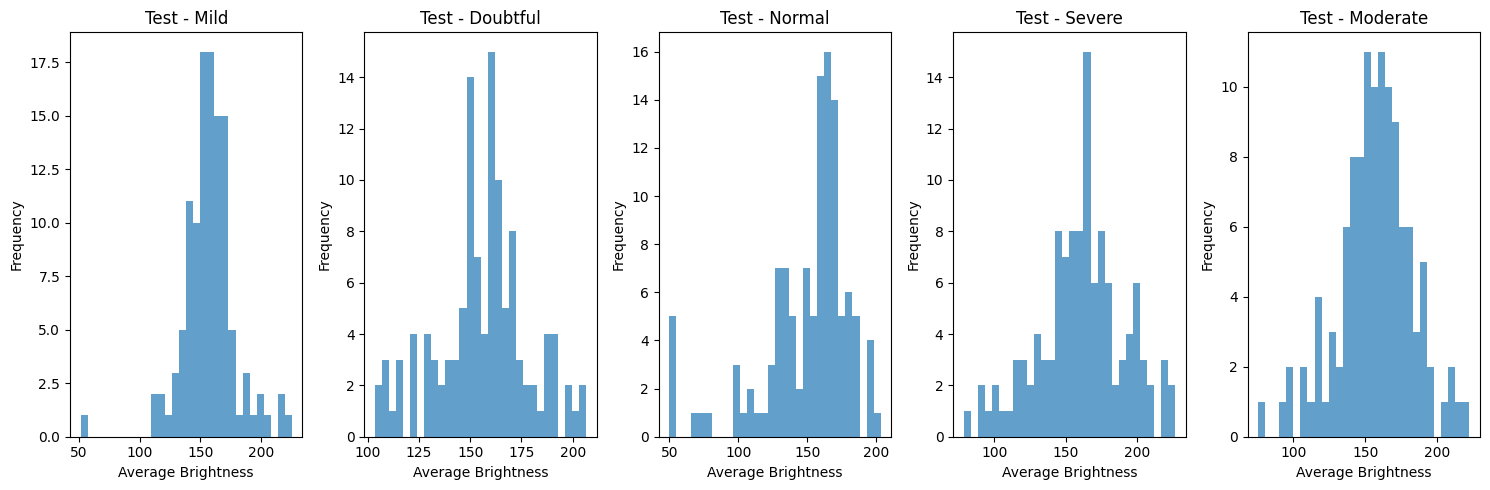

In [ ]:
plot_brightness_per_class_simple(test_dir, "Test", num_rows=1, num_cols=5)

- **Test - Mild** menunjukkan variasi kecerahan yang lebih terpusat di sekitar 150, dengan sebagian besar data pada kisaran 100-200.

- **Test - Doubtful** menunjukkan variasi yang lebih luas, tetapi masih mayoritas berada pada kisaran 100-175.

- **Test - Normal** menunjukkan distribusi yang relatif merata, dengan lebih banyak data pada kisaran 125-150.

- **Test - Severe** dan **Test - Moderate** menunjukkan distribusi kecerahan dengan variasi lebih besar, namun sebagian besar data masih dalam kisaran 100-200.

### Occlusion

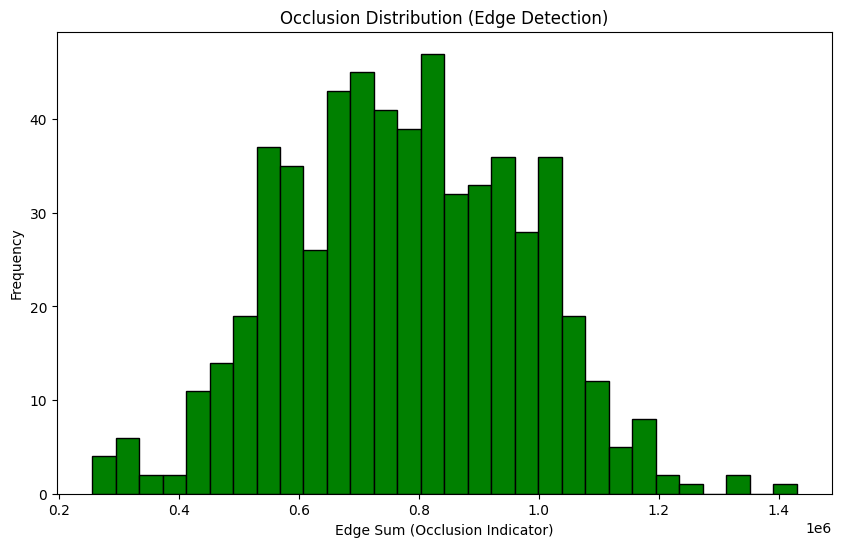

In [ ]:
plot_occlusion_variability(test_dir)

Pesebaran gambar yang terdeteksi occlusion cukup rata

### Angle

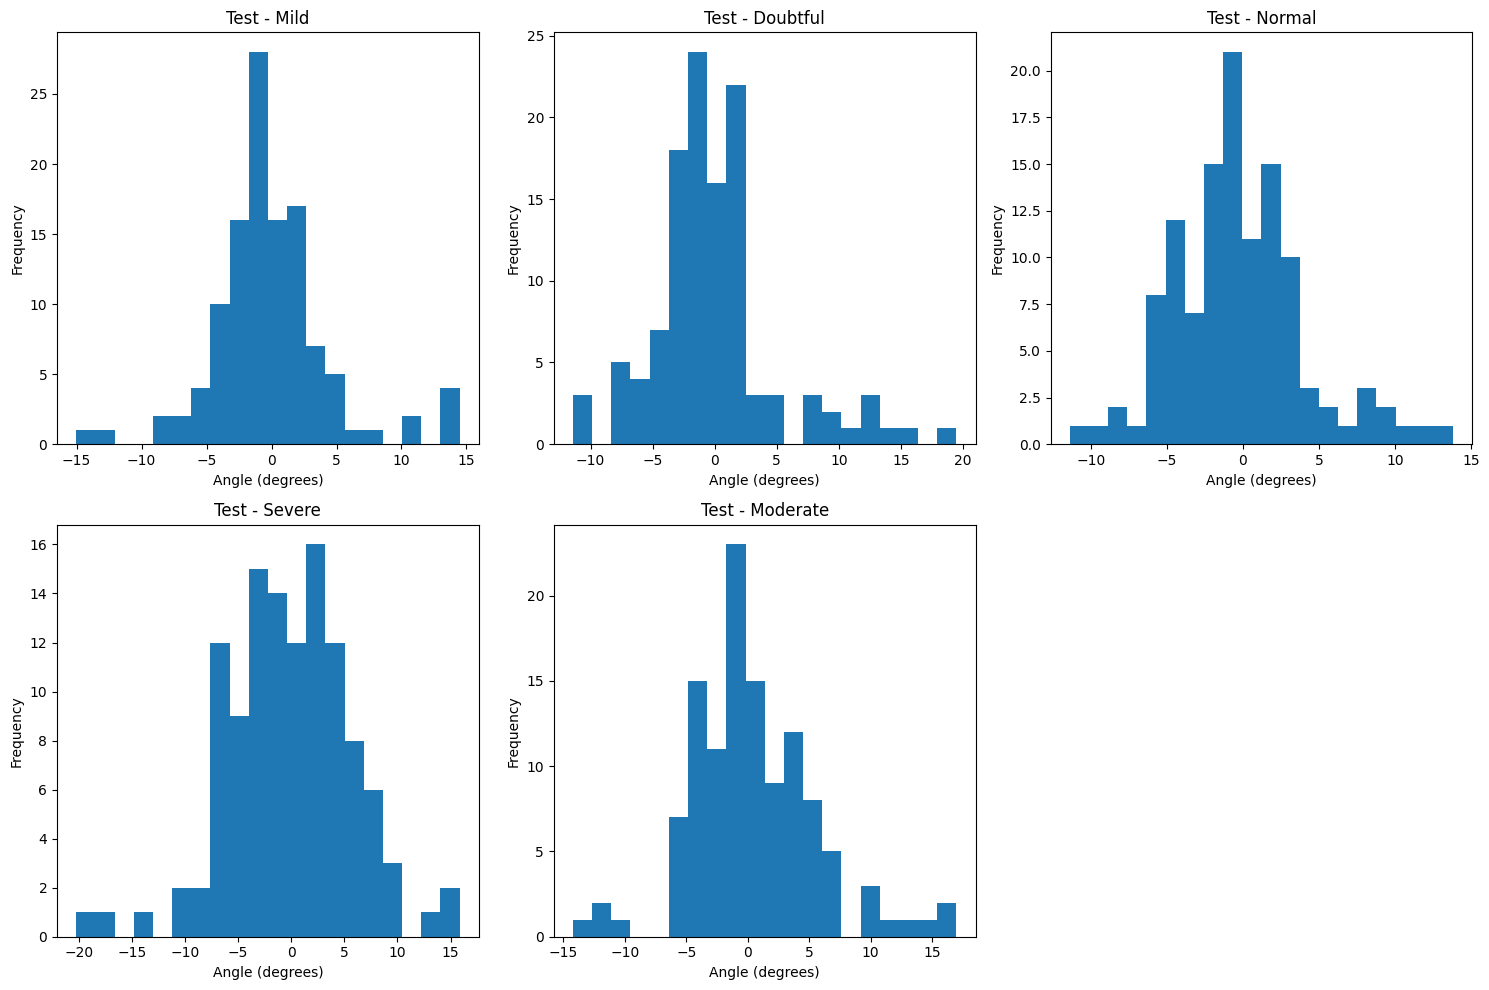

In [ ]:
plot_angle_variability(test_dir, "Test")

- **Normal**  
  Sudutnya paling banyak di sekitar 0 derajat → artinya gambar posisi normal
- **Mild**  
  Masih banyak yang dekat 0, tapi agak lebih menyebar → ada sedikit kemiringan, tapi masih ringan.
- **Moderate**
  Sudut agak menyebar lebih jauh dari 0, jadi ada kemiringan sedang.
- **Severe**  
  Banyak sudut jauh dari 0 → posisi sangat miring atau bengkok, artinya parah.
- **Doubtful**  
  Sebarannya acak dan agak lebar → hasilnya agak meragukan, susah dipastikan.

## Aspec Ratio and Resolution

## Data Train

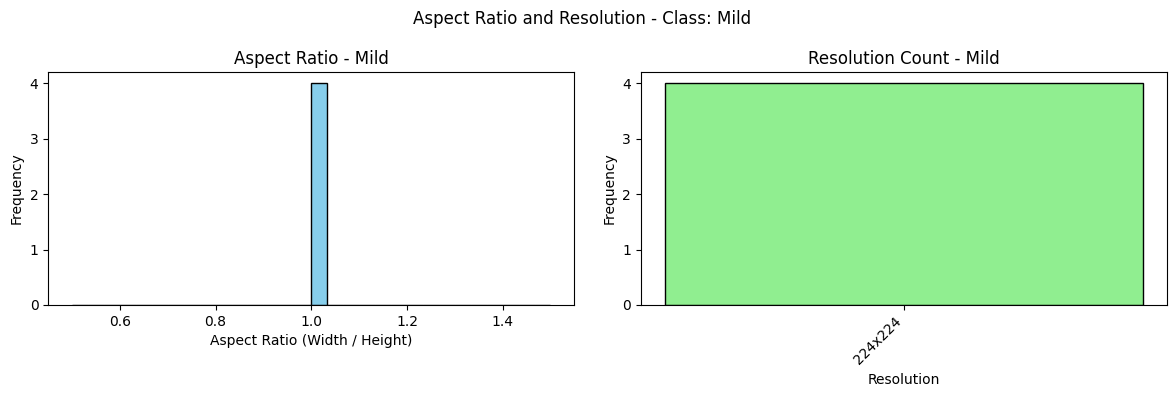

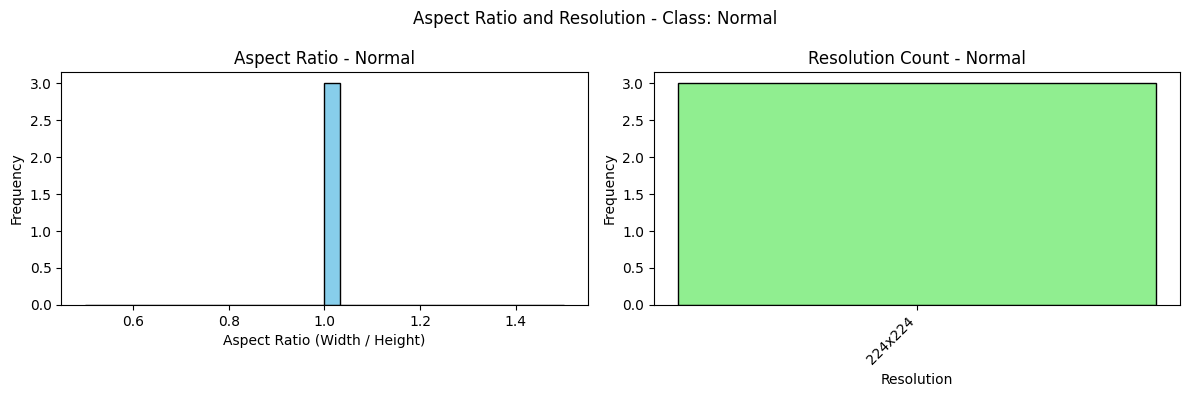

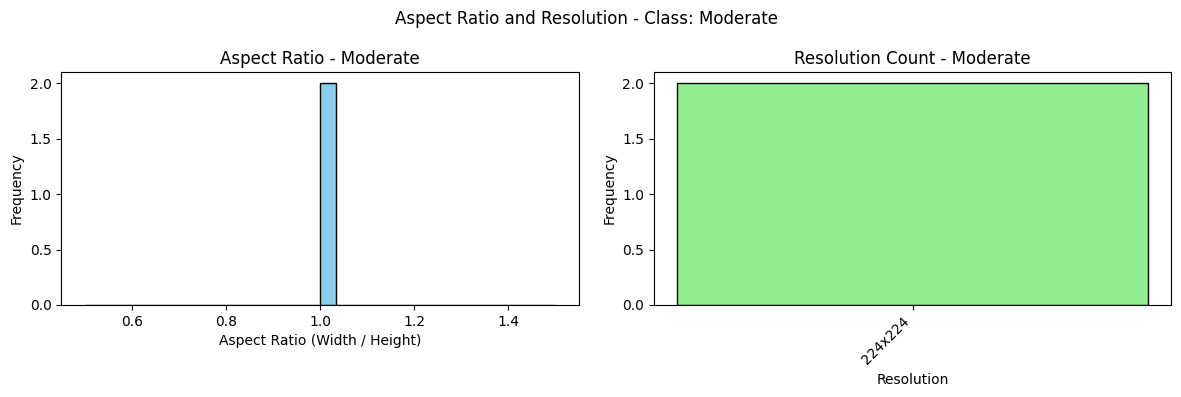

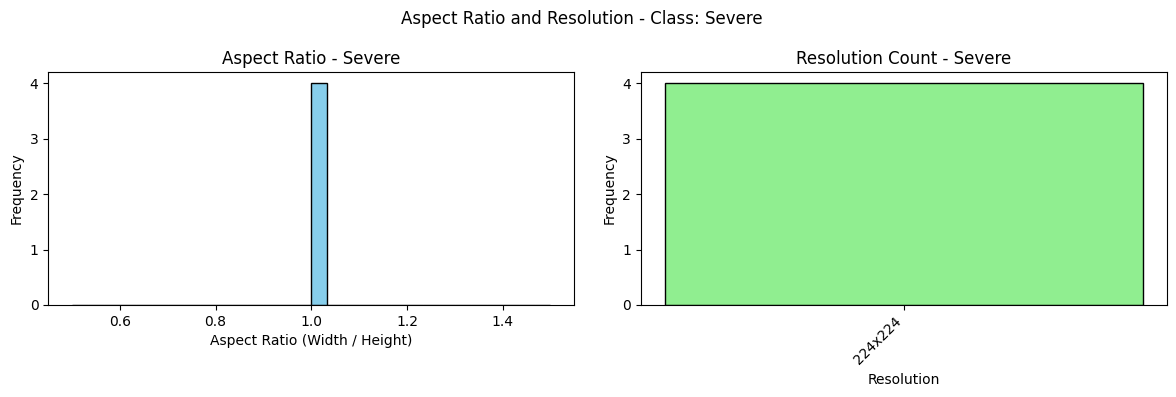

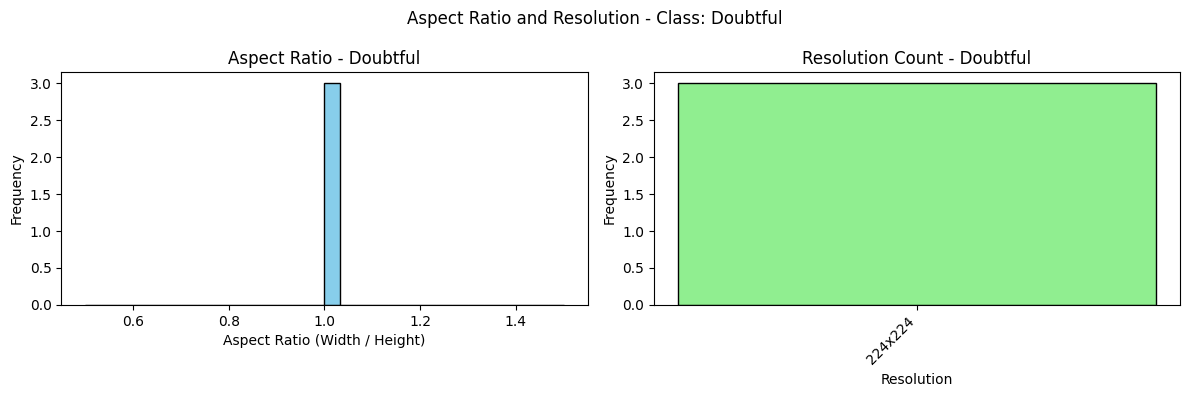

In [ ]:
# Fungsi untuk menampilkan distribusi resolusi dan rasio aspek
from collections import Counter

def display_aspect_ratio_and_resolution_distribution(directory, n_images):
    class_names = os.listdir(directory)

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        if not image_files:
            continue

        selected_images = random.sample(image_files, min(n_images, len(image_files)))
        aspect_ratios = []
        resolutions = []

        for img_file in selected_images:
            image_path = os.path.join(class_dir, img_file)
            try:
                img = Image.open(image_path)


                if len(img.getbands()) < 3:
                    continue

                width, height = img.size
                aspect_ratios.append(width / height)
                resolutions.append((width, height))

            except Exception as e:
                print(f"Error reading {image_path}: {e}")

        if not aspect_ratios:
            print(f"No valid RGB images in class {class_name}")
            continue

        # Plot Aspect Ratio Histogram
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
        plt.title(f"Aspect Ratio - {class_name}")
        plt.xlabel("Aspect Ratio (Width / Height)")
        plt.ylabel("Frequency")

        # Plot Resolution Frequency
        res_counts = Counter(resolutions)
        res_labels = [f"{w}x{h}" for (w, h) in res_counts.keys()]
        res_values = list(res_counts.values())

        plt.subplot(1, 2, 2)
        plt.bar(res_labels, res_values, color='lightgreen', edgecolor='black')
        plt.title(f"Resolution Count - {class_name}")
        plt.xlabel("Resolution")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')

        plt.suptitle(f"Aspect Ratio and Resolution - Class: {class_name}")
        plt.tight_layout()
        plt.show()

display_aspect_ratio_and_resolution_distribution(train_dir, 5)

Aspect Ratio-nya seragam (1.0 → bentuk kotak).

Resolusi-nya juga seragam (224x224 piksel).


## Data Test

In [ ]:
display_aspect_ratio_and_resolution_distribution(test_dir, 5)

No valid RGB images in class Mild
No valid RGB images in class Doubtful
No valid RGB images in class Normal
No valid RGB images in class Severe
No valid RGB images in class Moderate


# Splitting Data  
ubah greyscale dalam dataset menjadi RGB sebelum ditransform menuju Tensor

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

SEED_VALUE = 42

# Training generator
train_datagen = ImageDataGenerator(

    # Normalization
    rescale=1./255,

    # Augmentation
    rotation_range=172,  # Rotasi acak
    height_shift_range=0.4,  # Pergeseran vertikal
    zoom_range=1.0,
    horizontal_flip=True,  # Flip horizontal

    validation_split=0.15  # 15% data untuk validasi
)

# Testing generator
# Normalization
test_datagen = ImageDataGenerator(rescale=1./255)


# Train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multi-kelas
    color_mode='rgb',
    seed=SEED_VALUE,
    subset='training' # Menggunakan subset untuk training
)

# Valid data
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    seed=SEED_VALUE,
    subset='validation'  # Menggunakan subset untuk validation
)

# Test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=SEED_VALUE,
    color_mode='rgb'
)

# Validate
print(f"Train dataset size: {len(train_generator.filenames)}")
print(f"Validation dataset size: {len(valid_generator.filenames)}")
print(f"Test dataset size: {len(test_generator.filenames)}")

Found 4570 images belonging to 5 classes.
Found 805 images belonging to 5 classes.
Found 586 images belonging to 5 classes.
Train dataset size: 4570
Validation dataset size: 805
Test dataset size: 586


# Baseline Alexnet

In [ ]:
# Model AlexNet
def alexnet(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))


    # Second Convolutional Layer
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Third Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fourth Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Fifth Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Flattening layer
    model.add(layers.Flatten())

    # Fully Connected Layer 1 -> jumlah neuoron dalam input layer
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 2
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully Connected Layer 3 (Output Layer)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
model = alexnet(input_shape=(224, 224, 3), num_classes=5)

from tensorflow.keras.metrics import Precision, Recall

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)
model.summary()


# Train  model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,767,493 (178.40 MB)

 Trainable params: 46,767,493 (178.40 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 894s 6s/step - accuracy: 0.2021 - loss: 1.6892 - precision: 0.1552 - recall: 0.0049 - val_accuracy: 0.2149 - val_loss: 1.6094 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 934s 6s/step - accuracy: 0.2025 - loss: 1.6110 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2149 - val_loss: 1.6093 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 883s 6s/step - accuracy: 0.2144 - loss: 1.6095 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2149 - val_loss: 1.6092 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 867s 6s/step - accuracy: 0.2016 - loss: 1.6100 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2149 - val_loss: 1.6094 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 916s 6s/step - accuracy: 0.2141 - loss: 1.6103 - precision: 

26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
Akurasi pada data validasi: 19.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.08      0.12       158
           1       0.00      0.00      0.00       158
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00       158
           4       0.20      0.92      0.32       158

    accuracy                           0.20       805
   macro avg       0.09      0.20      0.09       805
weighted avg       0.09      0.20      0.09       805



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


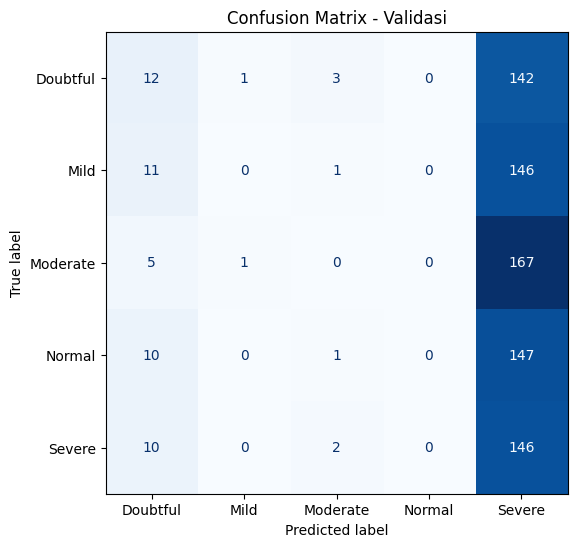

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

y_true = valid_generator.classes
y_pred_prob = model.predict(valid_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred) * 100  # dalam persen

print(f"Akurasi pada data validasi: {acc:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix dengan label dari valid_generator
class_labels = list(valid_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Validasi")
plt.grid(False)
plt.show()

Kelas 0, 1, 2, dan 3 memiliki precision, recall, dan f1-score yang sangat rendah (0.00), yang berarti model gagal dalam memprediksi kelas-kelas ini secara efektif.

Kelas 4 menunjukkan sedikit perbaikan, dengan recall tinggi 0.92 yang menunjukkan bahwa model mampu mengidentifikasi sebagian besar data yang benar-benar berasal dari kelas ini, meskipun precision-nya rendah (0.20).


- Confusion Matrix
Model terlalu sering nebak kelas "Severe", walaupun sebenarnya gambar itu dari kelas lain. Akhirnya, banyak prediksi yang salah dan model jadi nggak akurat untuk kelas selain "Severe".

# Modifikasi Model

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

# Fungsi builder model
def build_model(learning_rate=0.001, dropout_rate=0.5, dense_units=128):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', input_shape=(224, 224, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.Conv2D(16, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.Conv2D(24, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))
    model.add(layers.DepthwiseConv2D((3, 3), strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.Conv2D(40, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))
    model.add(layers.DepthwiseConv2D((5, 5), strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.Conv2D(80, (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))
    model.add(layers.DepthwiseConv2D((3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('swish'))

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(dense_units, activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Buat model pertama (model1)
model1 = build_model(learning_rate=0.001, dropout_rate=0.5, dense_units=128)
model1.summary()

# Latih model1
history1 = model1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_4              │ (None, 112, 112, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 16)   │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 24)   │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 24)   │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 112, 112, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_5              │ (None, 56, 56, 24)     │           240 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 56, 56, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 40)     │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 56, 56, 40)     │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 56, 56, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_6              │ (None, 28, 28, 40)     │         1,040 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 40)     │           160 │
│ (BatchNormalization)            │                        │             

 Total params: 21,509 (84.02 KB)

 Trainable params: 20,517 (80.14 KB)

 Non-trainable params: 992 (3.88 KB)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.2111 - loss: 2.1619 - val_accuracy: 0.2149 - val_loss: 1.6092
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 498s 3s/step - accuracy: 0.2285 - loss: 1.8127 - val_accuracy: 0.1963 - val_loss: 1.6109
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.2298 - loss: 1.7674 - val_accuracy: 0.2112 - val_loss: 1.6230
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.2323 - loss: 1.7237 - val_accuracy: 0.1963 - val_loss: 1.6339
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.2392 - loss: 1.6911 - val_accuracy: 0.2087 - val_loss: 1.7211
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - accuracy: 0.2432 - loss: 1.6591 - val_accuracy: 0.2248 - val_loss: 1.7693
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - accuracy: 0.2718 - loss: 1.6254 - val_accuracy: 0.2075 - val_loss: 1.8691
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.2464 - loss: 1.6229 - val_accu

26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
Akurasi pada data validasi: 19.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.01      0.01       158
           1       0.00      0.00      0.00       158
           2       0.21      0.27      0.23       173
           3       0.09      0.01      0.01       158
           4       0.20      0.70      0.31       158

    accuracy                           0.20       805
   macro avg       0.12      0.20      0.11       805
weighted avg       0.12      0.20      0.12       805



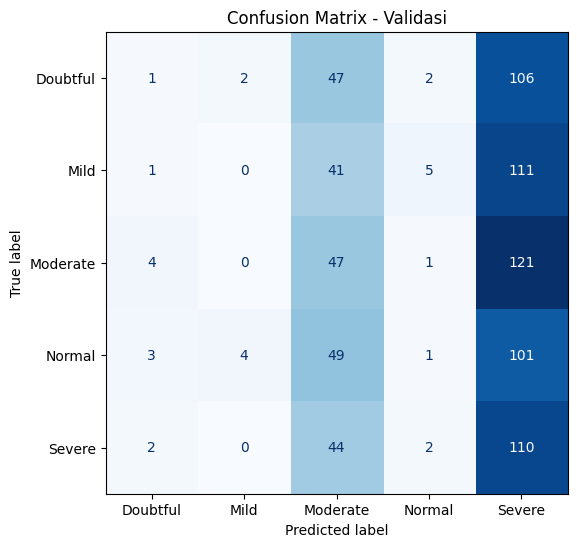

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

y_true = valid_generator.classes
y_pred_prob = model1.predict(valid_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred) * 100  # dalam persen

# Tampilkan akurasi
print(f"Akurasi pada data validasi: {acc:.2f}%\n")

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix dengan label dari valid_generator
class_labels = list(valid_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Validasi")
plt.grid(False)
plt.show()

Kelas 1, 3 memiliki precision, recall, dan f1-score yang sangat rendah (0.00-0.01), yang berarti model gagal dalam memprediksi kelas-kelas ini dengan baik.

Kelas 2 memiliki precision 0.21 dan recall 0.27, yang menunjukkan sedikit perbaikan dalam prediksi kelas ini, tetapi masih sangat rendah.

Kelas 4 menunjukkan precision 0.20 dan recall 0.70, yang lebih baik dibandingkan kelas lainnya.


- Confusion Matrix
Confusion Matrix
Model terlalu sering nebak kelas "Moderate" dan "Severe", padahal gambar aslinya dari kelas lain. Akibatnya, banyak prediksi yang salah.

# Evaluasi Model
Model Pertama lebih berhasil dalam mengenali kelas 4 dengan recall yang sangat tinggi (0.92), tetapi precision sangat rendah, yang menunjukkan bahwa banyak prediksi salah.

Model Kedua menunjukkan sedikit peningkatan dalam kelas 2 dan kelas 4, tetapi precision dan recall secara keseluruhan masih sangat rendah untuk kelas-kelas lainnya.

Confusion Matrix pada kedua model menunjukkan bahwa model sering salah mengklasifikasikan gambar ke kelas Severe dan Moderate, meskipun gambar itu berasal dari kelas lain. Ini menunjukkan adanya bias dalam prediksi model terhadap kelas-kelas tersebut.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")